In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [78]:
# create a model class

# inherit MODULE
class Model(nn.Module):
    
    # method 1
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        # inherit (call the nn.Module init method)
        super().__init__()
        
        # Input layer (4-features) --> h1 N --> h2 N --> output (3-classes)
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
            
    # method 2
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
        

In [79]:
torch.manual_seed(32) # weights and biases are random. This makes sure it is the same random start each time
model = Model() # needs to be in same cell.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
df = pd.read_csv('../../Data/iris.csv')

In [82]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [83]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


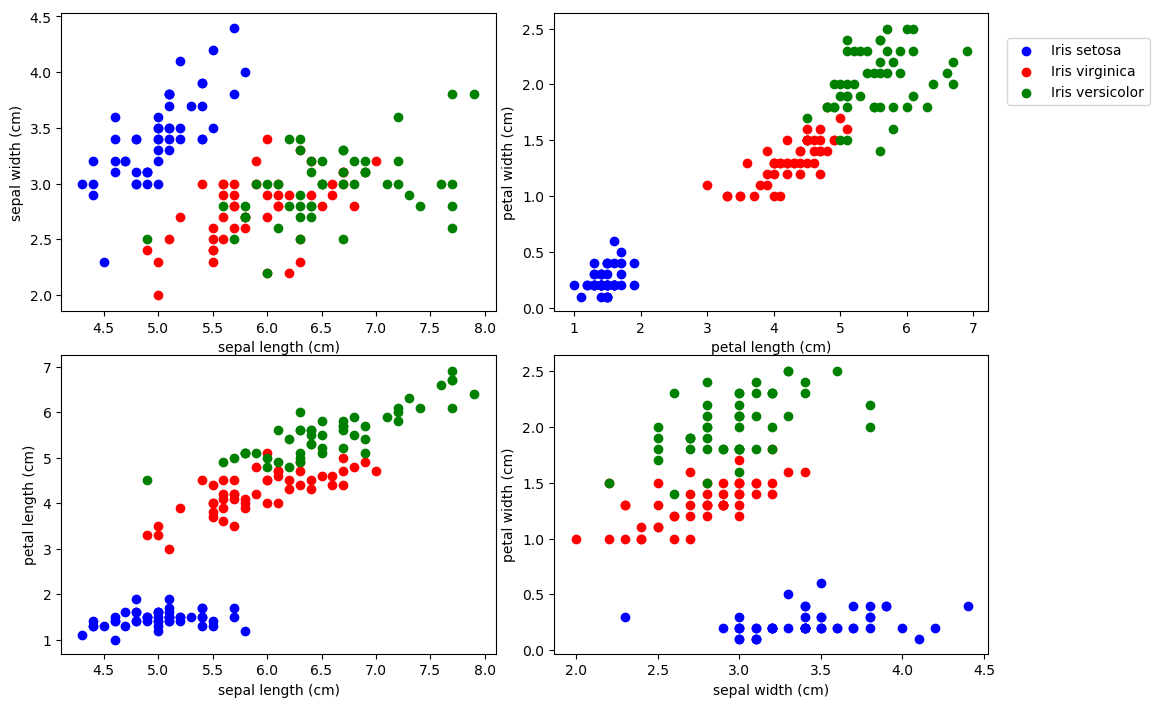

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [85]:
X = df.drop('target',axis=1)
y = df['target']

In [86]:
# convert to numpy array
X = X.values
y = y.values

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=.3, random_state=23
)

In [89]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [90]:
# one hot encode labels
# with pytorch w/ cross entropy loss don't have to do it
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [91]:
# finish defining model.
# what is the critera you are using to measure how far preds are from actual?
criterion = nn.CrossEntropyLoss()

# adam is good.
# pass in parameters as a parameter.
# Can play around with the learning rate. 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [92]:
# train your model.
# how many epochs?
# an epoch is 1 run through all training data

epochs = 100
losses = [] # to append losses to it

for i in range(epochs):
    y_pred = model.forward(X_train)
    
    # measure loss/ error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if i %10 == 0:
        print(f'epoch {i}: loss = {loss}')
        
    # BACK PROP
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0: loss = 1.1746922731399536
epoch 10: loss = 0.9579495191574097
epoch 20: loss = 0.799981415271759
epoch 30: loss = 0.5970627069473267
epoch 40: loss = 0.4152158796787262
epoch 50: loss = 0.27944937348365784
epoch 60: loss = 0.1739361733198166
epoch 70: loss = 0.11884573847055435
epoch 80: loss = 0.09448380023241043
epoch 90: loss = 0.08230827003717422


Text(0.5, 0, 'EPOCH')

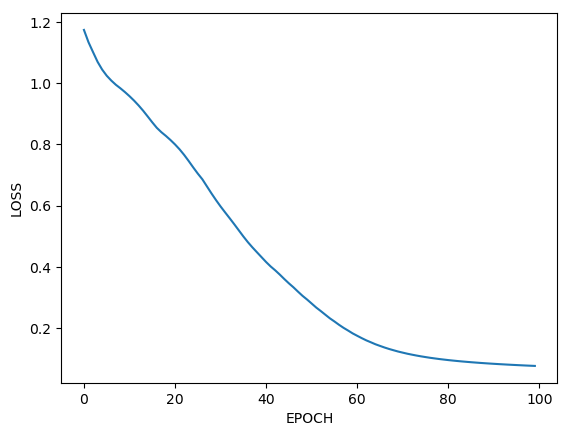

In [93]:
# plot epochs vs loss

plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('EPOCH')

# evaluate on data never seen
### how to save and load
### how to predict on single datapoint

In [94]:
# this is going to impact auto gradiant engine
# don't worry about back prop!
# don't change ab weight and bias
# speeds things up

with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [95]:
# good performance and not overfitting to training data
loss

tensor(0.0446)

In [96]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'we got {correct} # correct')


we got 44 # correct


In [97]:
torch.save(model.state_dict(), 'my_iris_model.pt') # can change filepath in string

In [98]:
new_model =  Model() # no idea what W or B are?
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [99]:
new_model.eval

<bound method Module.eval of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [ ]:
# loading and saving state dict assumes have Model class
# otherwise save as a pickle file. 

In [100]:
# torch.save(model, 'my_iris_model.pkl') # something like this

### use model on unseen data

In [101]:
# new flower picked out of field
mystery_iris = torch.tensor([5.6,2.7,2.2,0.5])

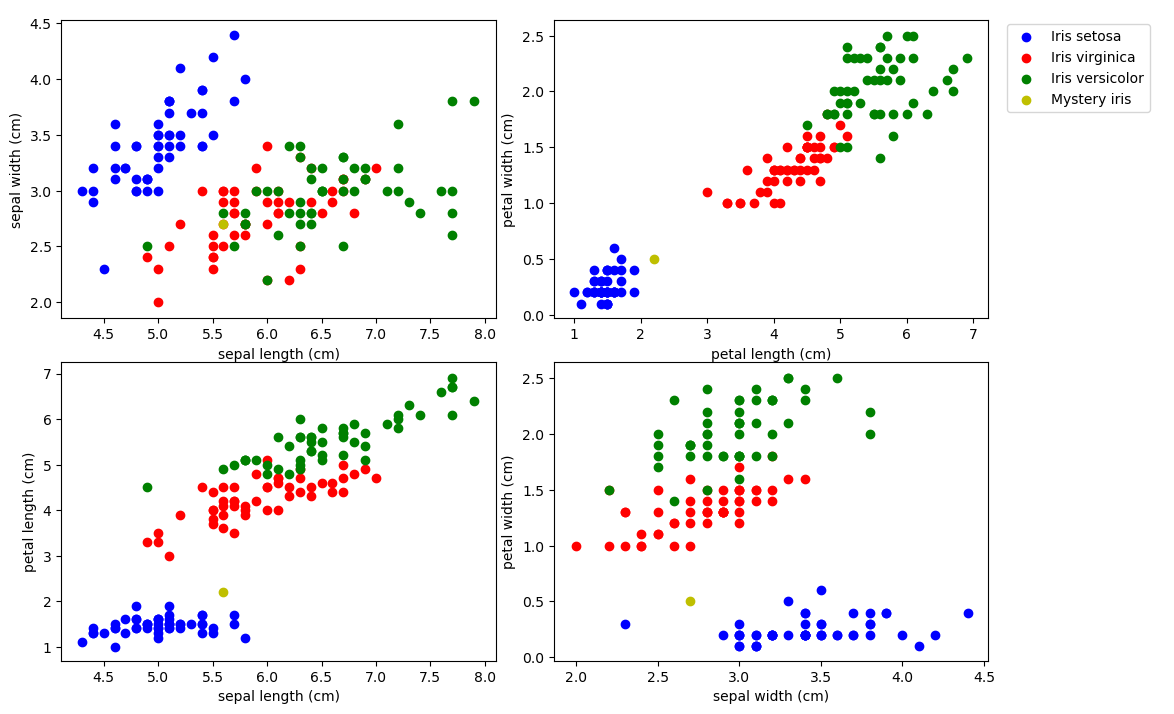

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [104]:
with torch.no_grad():
    print(new_model(mystery_iris).argmax())

tensor(0)
